In [13]:
# 讀入資料
import pandas as pd
df = pd.read_csv('HW3_creditcard.csv')
df

Time        V1        V2        V3        V4        V5        V6  \
0      143360  0.087399  1.955498 -3.009114 -0.611771  2.046245 -2.034809   
1      163005 -1.969644 -0.434381 -0.203709 -0.048957  0.395736 -1.529643   
2      151325  2.062615 -1.187470 -2.940538 -1.878575  1.946530  3.129848   
3      169962 -1.736890  1.276816  0.353397 -0.648723 -0.052977 -0.262870   
4        3760  1.401276 -0.683958 -0.915143 -1.616304  1.458234  3.274761   
...       ...       ...       ...       ...       ...       ...       ...   
28919   67659  1.208510 -1.608221  0.403127 -1.465710 -1.592717  0.066524   
28920  163646  1.997085 -0.334976 -0.305136  0.356486 -0.825710 -0.878371   
28921  151403 -0.607254  1.037853  0.180245 -0.974243  1.066338 -0.552829   
28922   58304  1.276545 -0.141506  0.278940 -0.197487 -0.382798 -0.209766   
28923   32871  1.182424 -0.457900 -1.060368 -0.331379  1.812226  3.656797   

             V7        V8        V9  ...       V21       V22       V23  \
0      1.783189 -0.513037  0.091237  ... -0.141101  0.084483 -0.294411   
1      1.029201  0.203756 -0.248148  ...  0.125004 -0.380350  0.365091   
2     -0.704875  0.659123 -0.672128  ...  0.101048  0.046789  0.135103   
3      0.223275  0.533696  0.415933  ... -0.471583 -1.238002 -0.246385   
4     -1.170329  0.710345  0.360104  ... -0.278087 -0.898279  0.081211   
...         ...       ...       ...  ...       ...       ...       ...   
28919 -1.233841  0.205880 -1.713045  ... -0.260568 -0.759445  0.073831   
28920 -0.523938 -0.037454  1.507587  ... -0.131976 -0.297754  0.369404   
28921  1.173086 -0.394738 -0.019722  ... -0.224596 -0.264097 -0.027561   
28922 -0.360697  0.080531  0.233241  ... -0.139368 -0.478909 -0.015475   
28923 -0.655162  0.883222  0.505123  ... -0.114525 -0.357949 -0.165359   

            V24       V25       V26       V27       V28  Amount  Class  
0     -0.768857 -0.046838  0.087448  0.314269  0.014855    1.82      0  
1      0.268591  0.121702 -0.128947 -0.069325 -0.061543  238.28      0  
2      0.722574  0.049329 -0.226307 -0.038544 -0.058289   89.20      0  
3      0.460213  0.454608  0.249480  0.217606  0.016917   64.94      0  
4      0.920023  0.357016 -0.508385 -0.019937  0.015447   42.00      0  
...         ...       ...       ...       ...       ...     ...    ...  
28919 -0.398662 -0.034086 -0.384216  0.020646  0.029675  132.00      0  
28920 -0.046107 -0.409260 -0.922612  0.051540 -0.029423    1.00      0  
28921 -0.463851 -0.863171  0.032642  0.070639  0.134187    5.38      0  
28922 -0.470974  0.173173  0.908495 -0.079702 -0.008598   10.00      0  
28923  1.071728  0.700666  0.553724 -0.032127  0.011588   59.94      0  

[28924 rows x 31 columns]

### 將原本的訓練資料分割為訓練集跟測試集

In [14]:
# 切割資料
from sklearn.model_selection import train_test_split
# 取特徵跟分類
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 用Decision tree 跟 Random forest (which is composed of multiple decision tree) 測試
### 發現Decision tree 結果較差, 例如召回率偏低  
### Random forest 明顯好很多 

Accuracy:  0.994007835906891
Recall score:  0.8193548387096774
Precision score:  0.8410596026490066
F1 score:  0.8300653594771241
roc_auc_score:  0.9082694644093969


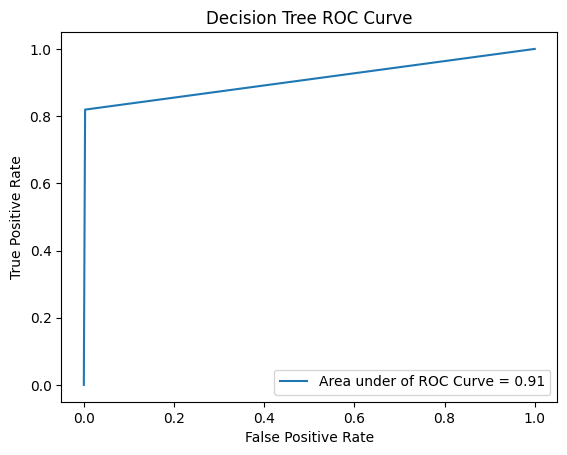

In [15]:
from sklearn.tree import DecisionTreeClassifier  # 決策樹
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

yt_pred = tree.predict(X_test) # 預測測試資料

yt_prob = tree.predict_proba(X_test)[:, 1] # 得到模型預測每個標籤的機率

# print scores
print("Accuracy: ", accuracy_score(y_test, yt_pred))
print("Recall score: ", recall_score(y_test, yt_pred))
print("Precision score: ", precision_score(y_test, yt_pred))
print("F1 score: ", f1_score(y_test, yt_pred))
print("roc_auc_score: ", roc_auc_score(y_test, yt_prob))

# draw ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, yt_prob, pos_label = 1) # calculate roc
AUC = auc(fpr, tpr) # calculate auc 

plt.plot(fpr, tpr, label = 'Area under of ROC Curve = {:.2f}'.format(AUC))
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

Accuracy:  0.9972343858031805
Recall score:  0.8580645161290322
Precision score:  0.9851851851851852
F1 score:  0.9172413793103448
roc_auc_score:  0.9648779583139361


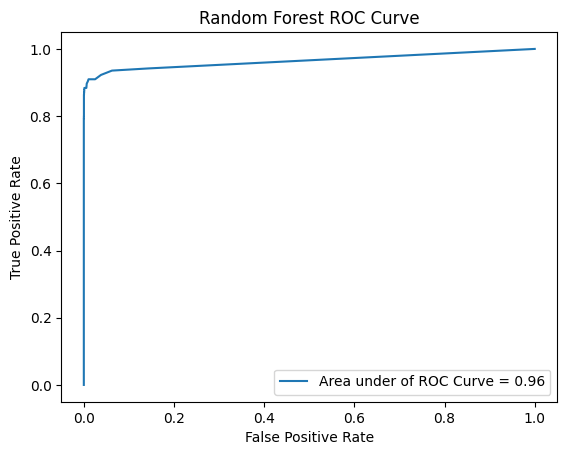

In [16]:
from sklearn.ensemble import RandomForestClassifier  # 用於分類問題
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
import numpy as np

# 使用Random forest 
model = RandomForestClassifier()  # 創建隨機森林分類器
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # 預測測試資料

y_prob = model.predict_proba(X_test)[:, 1] # 得到模型預測每個標籤的機率

# print scores
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(y_test, y_prob))

# draw ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label = 1) # calculate roc
AUC = auc(fpr, tpr) # calculate auc 

plt.plot(fpr, tpr, label = 'Area under of ROC Curve = {:.2f}'.format(AUC))
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

### 接下來要統計class的數量  
### 可以發現數量超不平均
### => Imbalanced dataset

In [17]:
# 統計class的數量
counts = df['Class'].value_counts()
print(counts)

0    28432
1      492
Name: Class, dtype: int64


## Decision tree v.s Modified Decision tree:
### 相對於最初什麼參數都沒有的 Decision tree
### 透過適當修改參數 發現其 Recall 跟 AUROC 有顯著提升  
### 但是 Precision 跟 F1-score 大幅降低
### Accuracy 略為降低

Accuracy:  0.9623185065683337
Recall score:  0.896774193548387
Precision score:  0.3088888888888889
F1 score:  0.45950413223140485
roc_auc_score:  0.9589804438085938


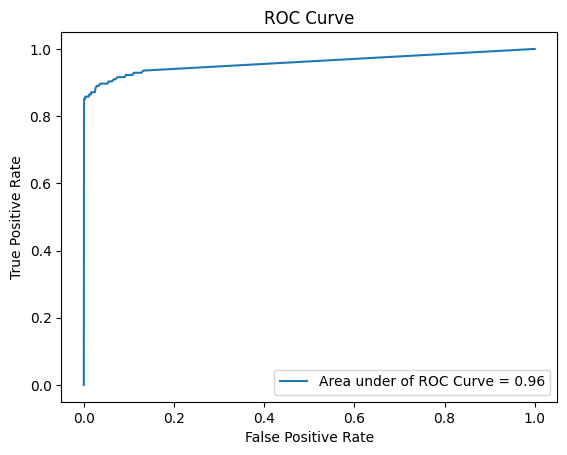

In [18]:
# Modified decision tree
from sklearn.tree import DecisionTreeClassifier  # 決策樹
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# SMOTE oversampling
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# modify the decision tree model
tree2 = DecisionTreeClassifier(splitter = "random", min_samples_split = 100, min_samples_leaf= 15, 
                                class_weight = "balanced")
tree2.fit(X_resampled, y_resampled)

yt2_pred = tree2.predict(X_test) # 預測測試資料
yt2_prob = tree2.predict_proba(X_test)[:, 1] # 得到模型預測每個標籤的機率

# print scores
print("Accuracy: ", accuracy_score(y_test, yt2_pred))
print("Recall score: ", recall_score(y_test, yt2_pred))
print("Precision score: ", precision_score(y_test, yt2_pred))
print("F1 score: ", f1_score(y_test, yt2_pred))
print("roc_auc_score: ", roc_auc_score(y_test, yt2_prob))

# draw ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, yt2_prob, pos_label = 1) # calculate roc
AUC = auc(fpr, tpr) # calculate auc 

plt.plot(fpr, tpr, label = 'Area under of ROC Curve = {:.2f}'.format(AUC))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

## Random forest v.s Modified Random forest  
### 因為原本的結果就已經不錯了，導致Recall提升有限  
### 值得注意的是 Precision 跟 F1-Score 有些微下降

Accuracy:  0.9959668126296382
Recall score:  0.8838709677419355
Precision score:  0.8896103896103896
F1 score:  0.8867313915857605
roc_auc_score:  0.9766358960384236


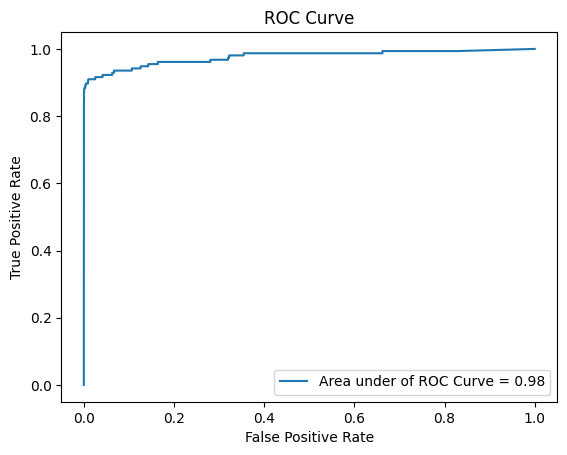

In [23]:
# Modified Random forest
from sklearn.ensemble import RandomForestClassifier  # Random forest
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# SMOTE oversampling
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# modify the decision tree model
model2 = RandomForestClassifier(n_estimators=100, min_samples_split = 50, min_samples_leaf= 15, 
                                class_weight = "balanced", random_state=42)
model2.fit(X_resampled, y_resampled)

y2_pred = model2.predict(X_test) # 預測測試資料
y2_prob = model2.predict_proba(X_test)[:, 1] # 得到模型預測每個標籤的機率

# print scores
print("Accuracy: ", accuracy_score(y_test, y2_pred))
print("Recall score: ", recall_score(y_test, y2_pred))
print("Precision score: ", precision_score(y_test, y2_pred))
print("F1 score: ", f1_score(y_test, y2_pred))
print("roc_auc_score: ", roc_auc_score(y_test, y2_prob))

# draw ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y2_prob, pos_label = 1) # calculate roc
AUC = auc(fpr, tpr) # calculate auc 

plt.plot(fpr, tpr, label = 'Area under of ROC Curve = {:.2f}'.format(AUC))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

### 使用 xgboost

Accuracy:  0.9974648536529154
Recall score:  0.864516129032258
Precision score:  0.9925925925925926
F1 score:  0.9241379310344827
roc_auc_score:  0.9782841873791221


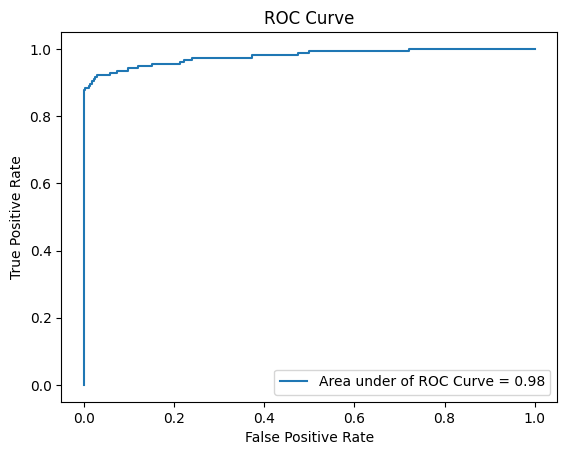

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc


# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_test)
prob = xgboostModel.predict_proba(X_test)[:, 1] # 得到模型預測每個標籤的機率

# print scores
print("Accuracy: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted))
print("Precision score: ", precision_score(y_test, predicted))
print("F1 score: ", f1_score(y_test, predicted))
print("roc_auc_score: ", roc_auc_score(y_test, prob))

# draw ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label = 1) # calculate roc
AUC = auc(fpr, tpr) # calculate auc 

plt.plot(fpr, tpr, label = 'Area under of ROC Curve = {:.2f}'.format(AUC))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()